In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 3)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [9]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6363636363636364


In [10]:
np.mean(cross_val_score(clf, x, y, cv=10, scoring='accuracy'))

np.float64(0.6303012519561815)

In [29]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [30]:
trf = ColumnTransformer(
    [('first', kbin_age, [0]), 
    ('second', kbin_fare, [1])]
    )

In [31]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [32]:
trf.named_transformers_['first'].n_bins_

array([15])

In [33]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [34]:
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_trf': x_train_trf[:,0],
    'fare': x_train['Fare'],
    'fare_trf': x_train_trf[:,1]
})

In [35]:
output['age_labels'] = pd.cut(x=x_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [36]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
179,36.0,10.0,0.0000,0.0,"(35.0, 38.0]",NaN
789,46.0,12.0,79.2000,13.0,"(42.0, 47.0]","(76.292, 108.9]"
769,32.0,9.0,8.3625,4.0,"(30.0, 32.0]","(8.158, 10.5]"
883,28.0,7.0,10.5000,5.0,"(25.0, 28.0]","(8.158, 10.5]"
75,25.0,6.0,7.6500,1.0,"(23.0, 25.0]","(7.25, 7.775]"


In [37]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred2 = clf.predict(x_test_trf)

print(accuracy_score(y_test, y_pred2))

0.6363636363636364


In [42]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6373239436619718


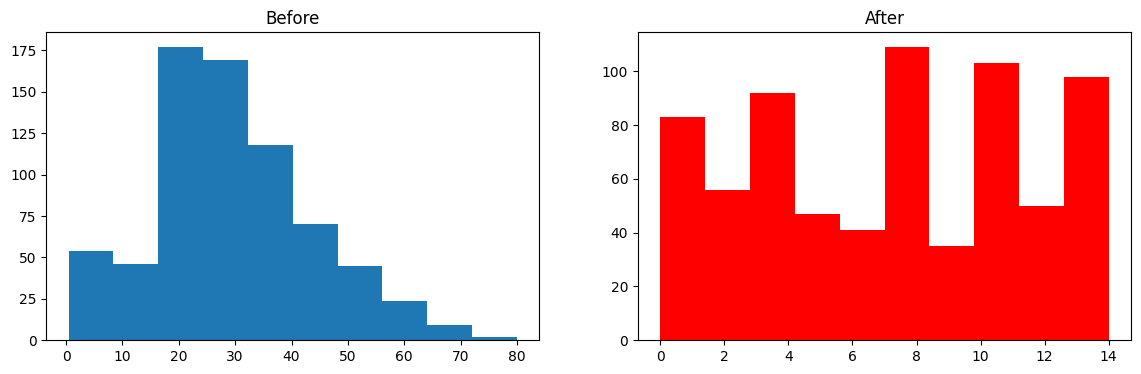

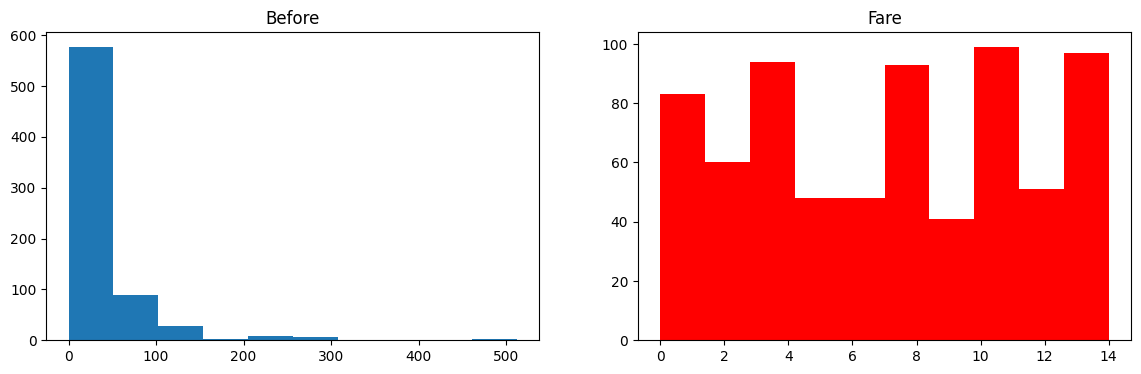

In [43]:
discretize(15,'quantile')

0.6373043818466353


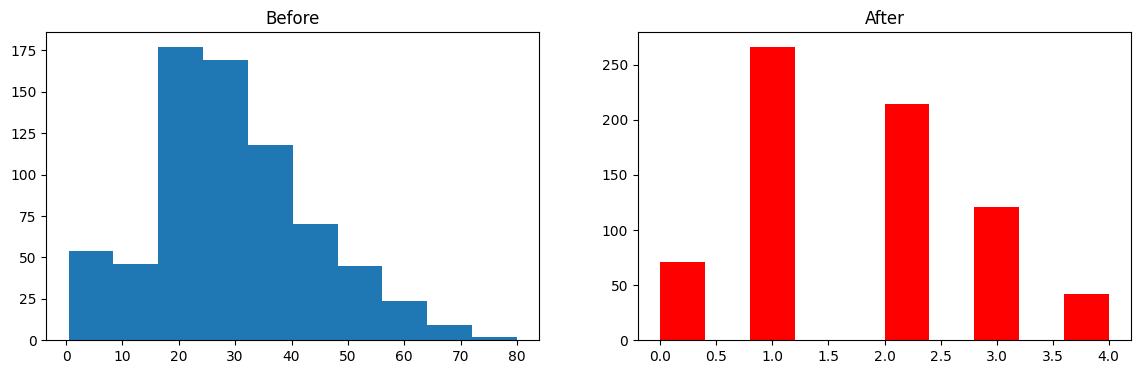

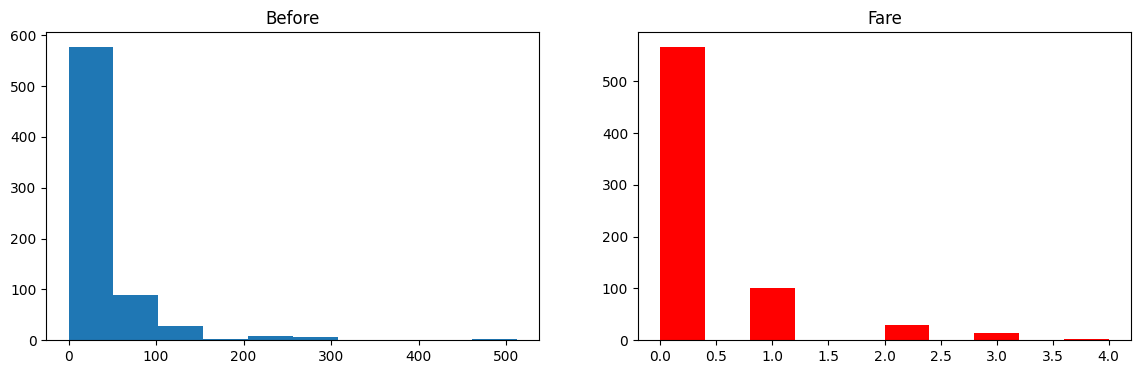

In [44]:
discretize(5,'kmeans')

0.6303012519561815


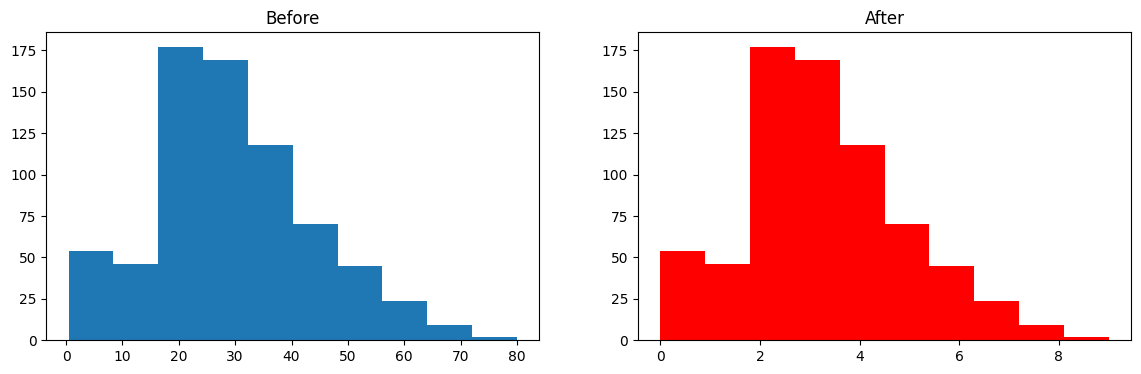

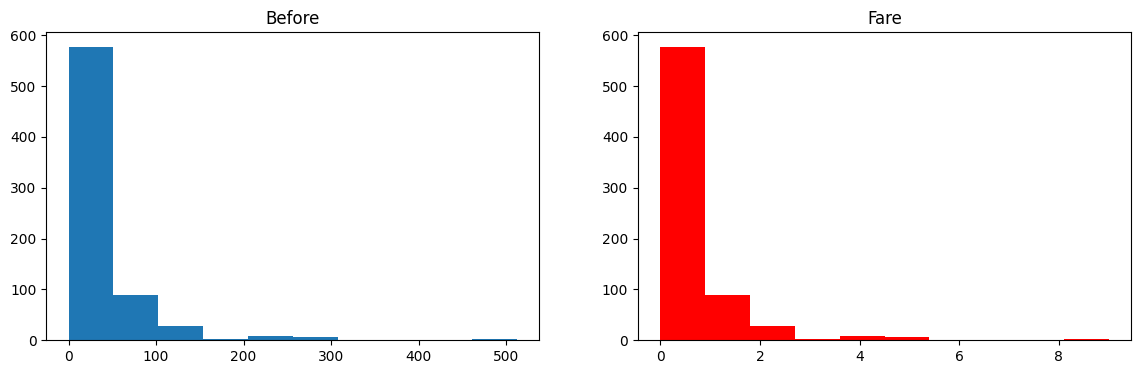

In [45]:
discretize(10,'uniform')